### 강수량 예측 프로그램-확률과 통계 탐구

In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn.model_selection
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [5]:
df = pd.read_csv('Project\data_jeju.csv')
print(df.head(5))

FileNotFoundError: [Errno 2] No such file or directory: 'Project\\data_jeju.csv'

In [ ]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180 entries, 0 to 179
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   date              180 non-null    int64  
 1   city              180 non-null    object 
 2   temperature       180 non-null    float64
 3   rainfall          180 non-null    float64
 4   moisture          180 non-null    float64
 5   sealevelpressure  180 non-null    float64
 6   dewpoint          180 non-null    float64
 7   daylight(hr)      180 non-null    float64
 8   windspeed         180 non-null    float64
dtypes: float64(7), int64(1), object(1)
memory usage: 12.8+ KB
None


In [ ]:
# 'date'과 'city' 열 제거
df_cleaned= df.drop(columns=['date', 'city'])

# 결과 확인
df_cleaned.head()

,temperature,rainfall,moisture,sealevelpressure,dewpoint,daylight(hr),windspeed
0,7.1,49.9,66.5,1024.5,1.0,133.0,2.8
1,7.1,49.9,66.5,1024.5,1.0,133.0,2.8
2,7.5,49.0,67.0,1023.5,1.5,184.2,1.8
3,6.1,55.6,66.0,1024.3,0.0,163.4,3.5
4,6.5,19.6,69.0,1024.9,1.1,133.3,8.9


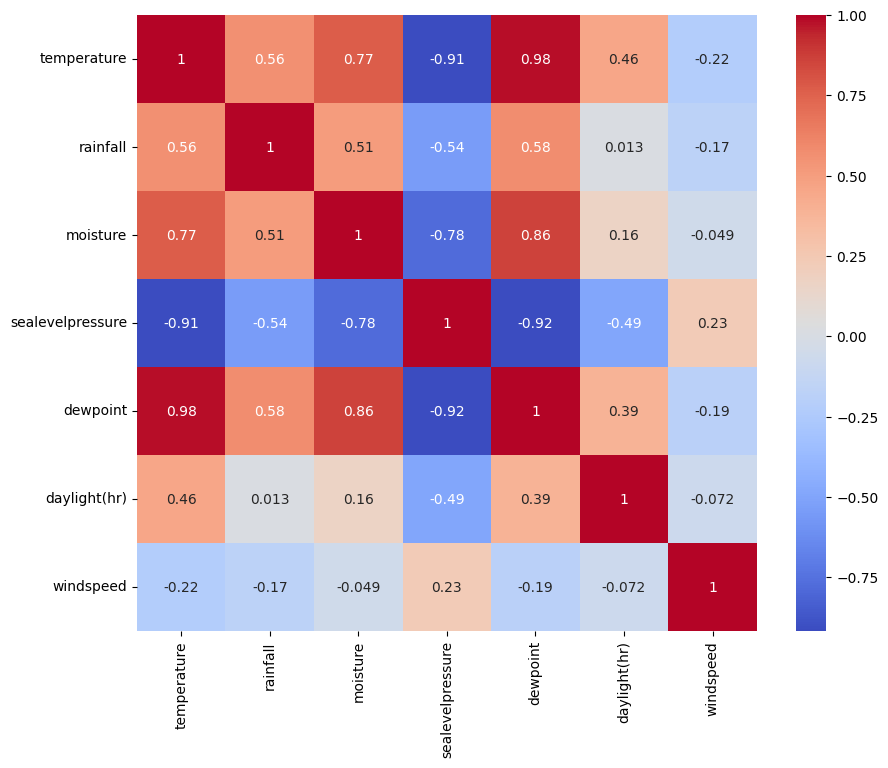

In [ ]:
corrleation = df_cleaned.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corrleation, annot=True, cmap='coolwarm')
plt.show()

In [ ]:
x=df_cleaned.drop(columns=['rainfall'])
y=df_cleaned['rainfall']

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)

In [ ]:
from keras.models import Sequential
from keras.layers import Dense
from sklearn.preprocessing import StandardScaler

#정규화
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

In [ ]:
 model = Sequential()
 model.add(Dense(200,input_dim=x.shape[1], activation='relu'))
 model.add(Dense(180, activation='linear'))
 model.add(Dense(160, activation='relu'))
 model.add(Dense(140, activation='linear'))
 model.add(Dense(120, activation='relu'))
 model.add(Dense(100, activation='linear'))
 model.add(Dense(80, activation='relu'))
 model.add(Dense(60, activation='linear'))
 model.add(Dense(20, activation='relu'))
 model.add(Dense(1, activation='linear'))
 model.compile(loss='mse',metrics=['mae'], optimizer='adam')
 model.fit(x_train_scaled, y_train, epochs=300, batch_size=30, validation_split=0.2)

Epoch 1/300


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


4/4 ━━━━━━━━━━━━━━━━━━━━ 4s 143ms/step - loss: 37737.2148 - mae: 150.6384 - val_loss: 51894.8203 - val_mae: 158.3779
Epoch 2/300
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step - loss: 39031.0898 - mae: 146.6925 - val_loss: 48798.1328 - val_mae: 149.3208
Epoch 3/300
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step - loss: 30863.3379 - mae: 132.9538 - val_loss: 38447.6797 - val_mae: 126.6251
Epoch 4/300
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step - loss: 25830.4297 - mae: 114.5299 - val_loss: 24357.6680 - val_mae: 124.4788
Epoch 5/300
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - loss: 15194.2861 - mae: 96.5279 - val_loss: 23239.2461 - val_mae: 127.7626
Epoch 6/300
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step - loss: 15920.1348 - mae: 92.3434 - val_loss: 19557.4238 - val_mae: 88.9279
Epoch 7/300
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 13498.6406 - mae: 75.5365 - val_loss: 18384.1660 - val_mae: 86.1395
Epoch 8/300
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 12484.0098 - mae: 74.3588 - val_loss: 17458.9199 - val_mae: 93

In [ ]:
y_pred = model.predict(x_test_scaled).flatten()
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f'mse: {mse:.2f}')
print(f'R**2 score: {r2:.2f}')

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 143ms/step
mse: 9213.50
R**2 score: 0.49


#조건부확률을 이용한 강수량 예측
비가 온다고 가정한 후 입력하는 조건에 따라 강수량을 예측함

In [ ]:
import pandas as pd

# 데이터 불러오기
df = pd.read_csv('/content/data_jeju.csv')
df = df.drop(columns=['date', 'city'])

# 조건 1: 월 평균 기온이 근처인 데이터만 필터링 (±0.5도 허용)
target_temp = int(input("월 평균 기온(℃) : "))
delta = 0.5
filtered_df = df[(df['temperature'] >= target_temp - delta) & (df['temperature'] <= target_temp + delta)]

# 조건 2: 강수량이 특정 값 이상 (예: 10mm 이상)
rain_threshold = int(input("기준 강수량(mm) : "))
st_rain = filtered_df['rainfall'] >= rain_threshold
print(st_rain)

count_rain = st_rain.sum()  #기온이 21도 근처인 데이터 중 강수량이 특정값 이상인 데이터
tem_count = len(filtered_df)

print(count_rain)
print(tem_count)


# 조건부 확률 계산
if tem_count > 0:
    conditional = count_rain / tem_count
    print(f"월 평균 기온이 약 {target_temp}℃일 때, 강수량이 {rain_threshold}mm 이상일 확률: {conditional :.2%}")
else:
    print("해당 조건을 만족하는 데이터가 없습니다.")

월 평균 기온(℃) : 7
기준 강수량(mm) : 40
0       True
1       True
2       True
4      False
5       True
6       True
55     False
56     False
57     False
59     False
120    False
126    False
128     True
129    False
Name: rainfall, dtype: bool
6
14
월 평균 기온이 약 7℃일 때, 강수량이 40mm 이상일 확률: 42.86%
